## Лабораторная работа 6. Жадная стратегия и динамическое программирование

by Константин Киселев, МОА-211


### Задание 1

Предположим, что вы собираетесь в турпоход. У вас есть рюкзак, емкость которого
составляет 6 фунтов, и список предметов, которые вы можете положить с собой в рюкзак.
У каждого предмета есть вес и ценность. Чем выше ценность, тем важнее для вас предмет.

Нарисуйте и вручную заполните таблицу, которая даст оптимальный набор предметов для
похода и общую ценность получившегося рюкзака. Ориентируйтесь на алгоритм
динамического программирования, описанный в лекции.

Список предметов возьмите согласно вашему варианту.

Вариант 3.

1. вода, 2 фунта, 8;
2. книга, 2 фунта, 5;
3. еда, 3 фунта, 7;
4. куртка, 1 фунт, 3;
5. камера, 2 фунта, 4


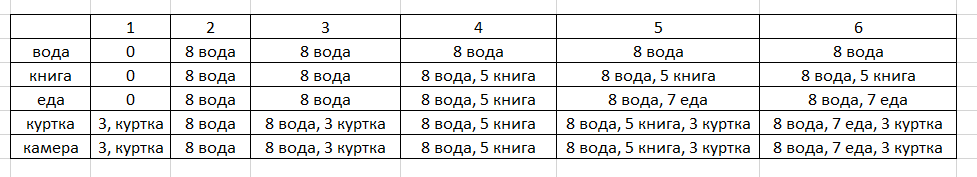


### Задание 2

Напишите программу, которая моделирует задачу о рюкзаке. Пользователь вводит объем
рюкзака и список предметов с указанием их веса и ценности. Вам необходимо подобрать
набор предметов максимальной ценности, которые поместятся в рюкзаке. Реализуйте три
варианта решения этой задачи:

1. Полный перебор
2. Жадный алгоритм
3. Динамическое программирование

Укажите вычислительная сложность (в O-нотации) для каждого алгоритма. Постройте
графики возрастания времени выполнения алгоритмов при увеличении входных данных.

Приведите примеры входных данных, когда жадный алгоритм дает оптимальное решение
и когда дает неоптимальное решение.


In [85]:
import matplotlib.pyplot as plt
import timeit
import random
import string

Решение полным перебором: ['вода', 'еда', 'куртка']
Решение жадным алгоритмом: ['вода', 'еда', 'куртка']
Решение динамическим программированием: ['вода', 'еда', 'куртка']
[1.2100004823878407e-05, 1.3600016245618463e-05, 1.3499986380338669e-05, 1.0500021744519472e-05, 1.2300006346777081e-05, 9.99998883344233e-06]


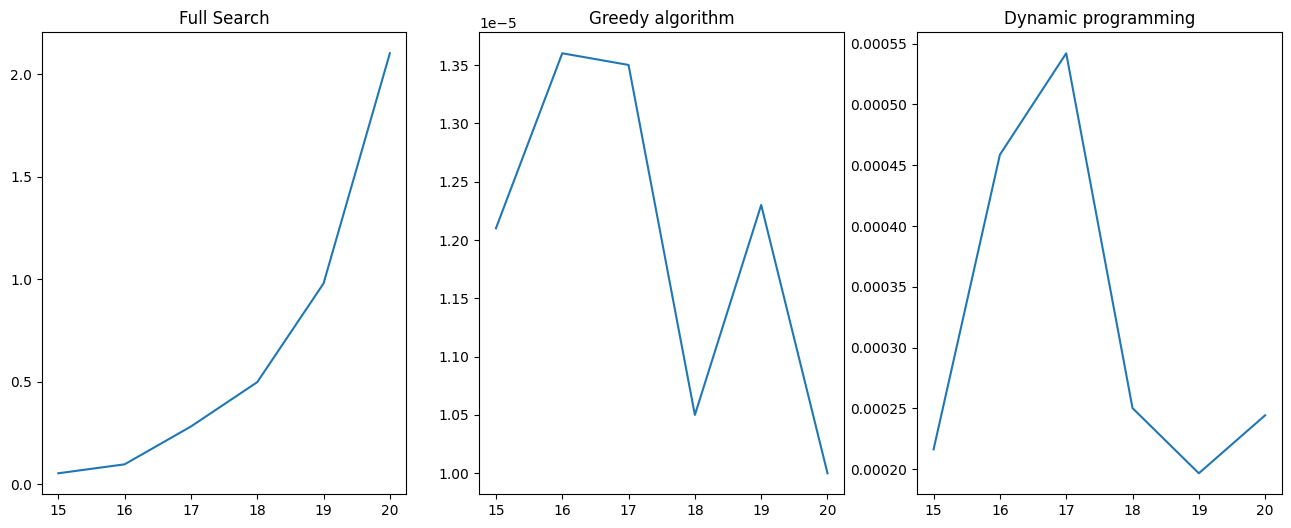

In [94]:
def full(vol: int, items: list) -> list:
    n = len(items)
    max_value = 0
    best_combination = []

    # Генерируем все возможные комбинации предметов
    for i in range(2**n):
        combination = []
        total_weight = 0
        total_value = 0

        # Проверяем каждый бит в двоичном представлении числа i
        for j in range(n):
            if (i >> j) & 1:
                combination.append(items[j][0])
                total_weight += items[j][1]
                total_value += items[j][2]

        # Проверяем, помещается ли комбинация предметов в рюкзак
        if total_weight <= vol and total_value > max_value:
            max_value = total_value
            best_combination = combination

    return best_combination


# Жадный алгоритм даёт оптимальное решение, когда самые дорогие предметы имеют оправданный вес по сравнению с предметами той же ценности,
# и наоборот, даёт неоптимальное решение, когда взять несколько более дешёвых предметов было бы выгоднее одного самого дорогого


def greedy(vol: int, items: list) -> list:
    # Сортируем предметы в порядке убывания стоимости

    sorted_items = sorted(items, key=lambda x: x[2], reverse=True)

    selected_items = []

    for item in sorted_items:
        # Забираем самые дорогие

        if vol > 0 and vol - item[1] >= 0:
            vol -= item[1]

            selected_items.append(item[0])

        else:
            # Если самый дорогой не помещается, пробуем следующий

            continue

    return selected_items


def dynamic(vol: int, items: list) -> list:
    num_items = len(items)
    # Создаем двумерный массив размером (количество предметов + 1) x (вес рюкзака + 1),
    # чтобы хранить значения оптимальной стоимости для разных подзадач
    dp = [[0] * (vol + 1) for _ in range(num_items + 1)]

    for i in range(1, num_items + 1):
        name, weight, value = items[i - 1]
        for j in range(1, vol + 1):
            # Если текущий предмет может поместиться в рюкзак,
            # то сравниваем стоимость с предыдущей подзадачей без этого предмета
            if weight <= j:
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - weight] + value)
            else:
                # Если предмет не помещается, то берем стоимость предыдущей подзадачи
                dp[i][j] = dp[i - 1][j]

    # Восстанавливаем список названий помещающихся предметов, начиная с последнего предмета
    result = []
    i = num_items
    j = vol
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            name, weight, value = items[i - 1]
            result.append(name)
            j -= weight
        i -= 1

    return result[::-1]


vol = 6

items = [
    ("вода", 2, 8),
    ("книга", 2, 5),
    ("еда", 3, 7),
    ("куртка", 1, 3),
    ("камера", 2, 4),
]


print(f"Решение полным перебором: {full(vol, items)}")


print(f"Решение жадным алгоритмом: {greedy(vol, items)}")


print(f"Решение динамическим программированием: {dynamic(vol, items)}")

plt_x = []
plt_search = []
plt_greedy = []
plt_dynamic = []
time_search = timeit.Timer("full(v, items)", globals=globals())
time_greedy = timeit.Timer("greedy(v, items)", globals=globals())
time_dynamic = timeit.Timer("dynamic(v, items)", globals=globals())

for i in range(15, 21):
    plt_x.append(i)
    v = random.randint(1, 100)
    items = [
        (
            "".join(random.choice(string.ascii_lowercase) for m in range(v)),
            random.randint(1, 10),
            random.randint(1, 20),
        )
        for j in range(i)
    ]

    time1 = time_search.timeit(number=1)
    plt_search.append(time1)

    time2 = time_greedy.timeit(number=1)
    plt_greedy.append(time2)

    time3 = time_dynamic.timeit(number=1)
    plt_dynamic.append(time3)

print(plt_greedy)

plt.figure(figsize=(16, 6), dpi=100)
plt.subplot(1, 3, 1)
plt.plot(plt_x, plt_search)
plt.title("Full Search")


plt.subplot(1, 3, 2)
plt.plot(plt_x, plt_greedy)
plt.title("Greedy algorithm")

plt.subplot(1, 3, 3)
plt.plot(plt_x, plt_dynamic)
plt.title("Dynamic programming")

plt.show()

По графику можно заметить, что полный перебор имеет сложность O(n^2)

Жадный алгоритм - числа очень малы, изменения являются погрешностью, сложность O(1)

Динамическое программирование - теоретически должна быть сложность O(n), но график почему-то плавает, в целом изменения очень малы и их тоже можно списать на погрешность

### Задание 3

Нарисуйте и вручную заполните таблицу для вычисления самой длинной общей подстроки
между строками blue и clue. Ориентируйтесь на алгоритм динамического
программирования, описанный в лекции.

<table>
<thead>
<tr>
<th>Буквы</th>
<th>c</th>
<th>l</th>
<th>u</th>
<th>e</th>
</tr>
</thead>
<tbody>
<tr>
<td>b</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>l</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>u</td>
<td>0</td>
<td>0</td>
<td>2</td>
<td>0</td>
</tr>
<tr>
<td>e</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>3</td>
</tr>
</tbody>
</table>


### Задание 4

Напишите программу, реализующую алгоритм нахождения самой длинной общей подстроки из лекции. Пользователь вводит слово с ошибкой и далее список похожих слов. Ваша программа должна вывести самое похожее слово согласно данному алгоритму.


In [87]:
def longest_substring(s1, s2):
    m = len(s1)
    n = len(s2)
    max_length = 0
    end_index = 0

    # Создаем матрицу размером (m+1) x (n+1) и заполняем ее нулями
    matrix = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            # Если символы совпадают
            if s1[i - 1] == s2[j - 1]:
                matrix[i][j] = matrix[i - 1][j - 1] + 1
                # Если новая подстрока длиннее предыдущей
                if matrix[i][j] > max_length:
                    max_length = matrix[i][j]
                    end_index = i

    # Возвращаем найденную подстроку
    return s1[end_index - max_length : end_index]


def find_most_similar_word(word, word_list):
    max_length = 0
    most_similar_word = ""

    # Ищем самую длинную общую подстроку среди слов из списка
    for test_word in word_list:
        common_substring = longest_substring(word, test_word)
        if len(common_substring) > max_length:
            max_length = len(common_substring)
            most_similar_word = test_word

    return most_similar_word


# Ввод данных пользователем
word_with_error = "houss"
similar_word_list = ["house", "houses", "building"]

# Находим самое похожее слово
most_similar_word = find_most_similar_word(word_with_error, similar_word_list)

# Вывод результата
print("Самое похожее слово:", most_similar_word)

Самое похожее слово: house


### Задание 5

Напишите программу, реализующую алгоритм нахождения самой длинной общей подпоследовательности из лекции. Пользователь вводит слово с ошибкой и далее список похожих слов. Ваша программа должна вывести самое похожее слово согласно данному алгоритму.


In [88]:
def longest_subsequence(word, sim):
    dct = {}
    for word in sim:
        cell = [[0] * len(word) for m in range(len(word))]
        for i in range(len(word)):
            for j in range(len(word)):
                if word[i] == word[j]:
                    cell[i][j] = cell[i - 1][j - 1] + 1
                else:
                    cell[i][j] = max(cell[i - 1][j], cell[i][j - 1])
        dct[word] = max(list(map(max, cell)))

    return max(dct, key=dct.get)


word_with_error = "hlo"

similar_words = ["hello", "hallo", "help"]

result = longest_subsequence(word_with_error, similar_words)


print("Самое похожее слово:", result)

Самое похожее слово: hello


### Задание 6

Имеется n предметов различных размеров (от 0.1 до 1.0). Есть неограниченное количество
одинаковых ящиков вместимостью 1.0. Необходимо разложить все n предметов в
минимальное количество ящиков.

Напишите программу, реализующую 4 жадных стратегии раскладки предметов по ящикам:

1. Первый подходящий ящик. Ящики просматриваются поочередно пока не найдется
   ящик, в котором достаточно свободного места для упаковки очередного предмета.
   Если такого ящика нет, то предмет кладется в новый ящик.
   Например, упаковка предметов размерами (0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5)
   пройдет следующим образом: первый ящик — [0.5, 0.3, 0.1], второй — [0.7, 0.2],
   третий — [0.9], четвертый — [0.6, 0.4], пятый — [0.8], шестой — [0.5]. Т.е. ответом
   будет 6 ящиков.
2. Наиболее подходящий ящик. Выбирается ящик, в котором останется как можно
   меньше места после помещения туда очередного предмета. Укладка в новый ящик
   применяется только в том случае, если очередной предмет не помещается ни в какой
   из имеющихся ящиков.
   Например, упаковка предметов размерами (0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5)
   пройдет следующим образом: первый ящик — [0.5, 0.5], второй — [0.7, 0.3], третий
   — [0.9, 0.1], четвертый — [0.6, 0.4], пятый — [0.8, 0.2]. Т.е. ответом будет 5 ящиков.
3. Следующий подходящий ящик. Мы продолжаем укладку каждого ящика до тех пор,
   пока очередной предмет в него помещается. Если предмет не влезает в ящик, то мы
   берем новый ящик, а к ранее уложенным ящикам уже не возвращаемся.
   Например, упаковка предметов размерами (0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5)
   пройдет следующим образом: первый ящик — [0.5], второй — [0.7, 0.3], третий —
   [0.9], четвертый — [0.6], пятый — [0.8, 0.1], шестой — [0.4, 0.2], седьмой — [0.5].
   Т.е. ответом будет 7 ящиков.
4. Наименее подходящий ящик. Выбирается ящик, в котором останется как можно
   больше места после помещения туда очередного предмета. Укладка в новый ящик
   применяется только в том случае, если очередной предмет не помещается ни в какой
   из имеющихся ящиков.
   Например, упаковка предметов размерами (0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5)
   пройдет следующим образом: первый ящик — [0.5, 0.3], второй — [0.7], третий —
   [0.9], четвертый — [0.6, 0.1], пятый — [0.8], шестой — [0.4, 0.2], седьмой — [0.5].
   Т.е. ответом будет 7 ящиков.

Сгенерируйте случайные наборы предметов (размером от 0.1 до 0.9) в количестве 50, 100,
200 и 500. Осуществите на каждом из наборов проверку всех четырех стратегий и
посмотрите, какая из них приводит к меньшему числу ящиков.
В отчете приведите ваши результаты в виде таблицы.


In [89]:
def first_suitable(items):
    boxes = [[]]
    for item in items:
        for box in boxes:
            if sum(box) + item <= 1.0:
                box.append(item)
                break
        else:
            boxes.append([item])

    return len(boxes)


def most_suitable(items):
    boxes = [[]]

    for item in items:
        min_space = 1.1
        min_box = None
        for box in boxes:
            space_left = 1.0 - sum(box)
            if item <= space_left < min_space:
                min_space = space_left
                min_box = box
        if min_box is not None:
            min_box.append(item)
        else:
            boxes.append([item])

    return len(boxes)


def next_suitable(items):
    boxes = []
    box = []
    for item in items:
        if sum(box) + item <= 1.0:
            box.append(item)
        else:
            boxes.append(box)
            box = [item]
    boxes.append(box)

    return len(boxes)


def least_suitable(items):
    boxes = [[]]

    for item in items:
        max_space = 0
        max_box = None
        for box in boxes:
            space_left = 1.0 - sum(box)
            if space_left >= item and space_left > max_space:
                max_space = space_left
                max_box = box
        if max_box is not None:
            max_box.append(item)
        else:
            boxes.append([item])

    return len(boxes)


def random_items(length):
    return tuple([random.uniform(0.1, 1.0) for i in range(length)])


for n in (50, 100, 200, 500):
    print(f"n = {n}")
    items = random_items(n)
    print(f"Первый подходящий ящик: {first_suitable(items)}")
    print(f"Наиболее подходящий ящик: {most_suitable(items)}")
    print(f"Следующий подходящий ящик: {next_suitable(items)}")
    print(f"Наименее подходящий ящик: {least_suitable(items)}")

n = 50
Первый подходящий ящик: 34
Наиболее подходящий ящик: 33
Следующий подходящий ящик: 40
Наименее подходящий ящик: 36
n = 100
Первый подходящий ящик: 63
Наиболее подходящий ящик: 62
Следующий подходящий ящик: 78
Наименее подходящий ящик: 66
n = 200
Первый подходящий ящик: 111
Наиболее подходящий ящик: 111
Следующий подходящий ящик: 140
Наименее подходящий ящик: 121
n = 500
Первый подходящий ящик: 308
Наиболее подходящий ящик: 304
Следующий подходящий ящик: 383
Наименее подходящий ящик: 331


Так как предметы заполняются случайно, при перекомпилировании результат может незначительно отличаться.

Самым эффективным жадным алгоритмом является "наиболее подходящий ящик".

<table>
<thead>
<tr>
<th></th>
<th>первый подходящий</th>
<th>наиболее подходящий</th>
<th>следующий подходящий</th>
<th>наименее подходящий</th>
</tr>
</thead>
<tbody>
<tr>
<td>50</td>
<td>34</td>
<td>33</td>
<td>40</td>
<td>36</td>
</tr>
<tr>
<td>100</td>
<td>63</td>
<td>62</td>
<td>78</td>
<td>66</td>
</tr>
<tr>
<td>200</td>
<td>111</td>
<td>111</td>
<td>140</td>
<td>121</td>
</tr>
<tr>
<td>500</td>
<td>308</td>
<td>304</td>
<td>383</td>
<td>331</td>
</tr>
</tbody>
</table>


### Задание 7

Есть купюры и монеты номиналами: 1, 3, 4, 10, 50, 100. В банкомате неограниченное
количество купюр и монет каждого номинала. Мы хотим снять со счета n рублей. Нужно
вывести на экран минимальный набор купюр и монет, который может выдать банкомат,
чтобы сумма получилась ровно n.

1. Напишите жадный алгоритм решения задачи. Подсказка: выбирайте купюры и
   монеты по убыванию номинала.
2. Используйте динамическое программирование, чтобы рассчитать минимальное
   количество требуемых купюр и монет.
3. Приведите пример входных данных, когда жадный алгоритм выдает не оптимальное
   решение.


In [90]:
def greedy(n):
    coins = ["1$", "3$", "4$", "10$", "50$", "100$"]
    dct = {}
    for i in coins[::-1]:
        coin = int(i.replace("$", ""))
        multiplier = n // coin
        n -= multiplier * coin
        dct[i] = multiplier

    return dct


def dynamic(n):
    coins = ["1$", "3$", "4$", "10$", "50$", "100$"]
    table = [0 if i == 0 else float("inf") for i in range(n + 1)]

    for j in range(1, n + 1):
        for i in coins:
            coin = int(i.replace("$", ""))
            if j - coin >= 0:
                table[j] = min(table[j], table[j - coin] + 1)

    return table[n]


n = 5374
print(f"Жадный алгоритм: {greedy(n)}")
print(
    f"Динамическое программирование, минимальное количество требуемых купюр и монет: {dynamic(n)}"
)

Жадный алгоритм: {'100$': 53, '50$': 1, '10$': 2, '4$': 1, '3$': 0, '1$': 0}
Динамическое программирование, минимальное количество требуемых купюр и монет: 57


### Задание 8

Напишите программу, моделирующую работу клиентов с банкоматом. В банкомате есть
купюры и монеты номиналами: 1, 3, 4, 10, 50, 100, но, в отличие от предыдущей задачи, их
количество конечно.
В начале работы программы вы задаете:

- количество клиентов
- для каждого клиента количество рублей, которые он хочет снять (считаем, что эта сумма всегда корректна и имеется на счету клиента)
- изначальное количество купюр и монет в банкомате

Далее вы по очереди обрабатываете запросы клиентов. Для каждого клиента выведите на
экран минимальный набор купюр и монет для его суммы или сообщение о невозможности
предоставить данную суммы из-за нехватки купюр и монет. Если минимальный набор
найден успешно, то вычтите его из запасов банкомата и выведите на экран получившейся
остаток.

Проведите несколько запусков программы с разными начальными данными и различными
исходами работы с банкоматом.


In [91]:
def greedy(n, available):
    result = {}
    for coin in list(available.keys())[::-1]:
        multiplier = n // coin
        if multiplier > available[coin]:
            multiplier = available[coin]
        n -= multiplier * coin
        result[coin] = multiplier
        available[coin] -= result[coin]
    return result if n == 0 else {}


client_num = 4
available = {1: 10, 3: 10, 4: 10, 10: 10, 50: 10, 100: 10}
need = [1000, 500, 100, 10000]

for i in range(client_num):
    n = need[i]
    result = greedy(n, available)
    if not result:
        print("В банкомате недостаточно монет для выдачи указанной суммы!")
    else:
        print(f"Выдан набор монет: {result}")
        print(f"Оставшееся количество средств в банкомате: {available}")

Выдан набор монет: {100: 10, 50: 0, 10: 0, 4: 0, 3: 0, 1: 0}
Оставшееся количество средств в банкомате: {1: 10, 3: 10, 4: 10, 10: 10, 50: 10, 100: 0}
Выдан набор монет: {100: 0, 50: 10, 10: 0, 4: 0, 3: 0, 1: 0}
Оставшееся количество средств в банкомате: {1: 10, 3: 10, 4: 10, 10: 10, 50: 0, 100: 0}
Выдан набор монет: {100: 0, 50: 0, 10: 10, 4: 0, 3: 0, 1: 0}
Оставшееся количество средств в банкомате: {1: 10, 3: 10, 4: 10, 10: 0, 50: 0, 100: 0}
В банкомате недостаточно монет для выдачи указанной суммы!
